# Projet-5  CODE 

## Unsupervised Learning 

_______

Dans l’apprentissage non-supervisé, on dispose  d’un Dataset (𝑥) sans valeur (𝑦), et la machine apprend à reconnaitre des **structures** dans les données (𝑥) qu’on lui montre.

On peut ainsi regrouper des donnés dans des clusters (c’est le **Clustering**), **détecter des anomalies**, ou encore **réduire la dimension** de données très riches en compilant les dimensions ensembles.


On cherche y !!!!!!!!!!!

______

![Alt text](images/1.PNG)

### Typology

____________ 

     1. Clustering
Une des applications les plus populaires de l’apprentissage non-supervisé est le Clustering. Le principe est de laisser la machine apprendre à trier des données selon leur ressemblances (et donc en analysant uniquement les features X).

Les algorithmes à connaitre :
- K-Means : Tres rapide, mais non-efficace sur les clusters non-convexes.
- AgglomerativeClustering : assez lent, mais efficace sur les données non-convexes
- DBSCAN : efficace sur les données non-convexes, mais sélection du nombre de clusters automatique

Applications :
- Trier des documents, des photos, des tweets
- Segmenter la clientèle d’une entreprise
- Optimiser l’organisation d’un système informatique, etc…

_________

![Alt text](images/2.PNG)

______

    2. Détection d’Anomalies
Un autre exemple d’application de l’apprentissage non-supervisé est la Détection d’Anomalies. En analysant la structure X des données, la machine est capable de trouver les échantillons dont les features sont tres éloignées de celles des autres échantillons. Ces échantillons sont alors considérés comme étant des anomalies.


Les algorithmes à connaitres :
- IsolationForest : Efficace pour détecter des outliers dans le train_set
- Local Outlier Factor : Efficace pour détecter des anomalies futures


Applications :
- Nettoyer un Dataset des valeurs aberrantes qui le composent
- Détecter un comportement anormal sur un site Internet ou sur une caméra de surveillance
- Maintenance prédictive des machines d’une usine

______

______

    3. Réduction de dimension
La dernière application très importante de l’apprentissage non-supervisé est la réduction de dimension. Le principe est de réduire la complexité superflue d’un dataset en projetant ses données dans un espace de plus petite dimension (un espace avec moins de variables). Le but est d’Accélérer l’apprentissage de la machine et de Lutter contre le fléau de la dimension.


Algorithmes a connaitres :
- Analyse en composantes principales (PCA) : le plus populaire et le plus simple a comprendre
- TSNE
- Isomap


Applications :
- Visualisation de données : afficher sur un graphique 2D un espace de grande dimension
- Compression de dataset : réduire au maximum le poids d’un dataset en conservant un maximum de qualité

______

## K-means clustering 

![Alt text](images/3.PNG)


On répète ainsi les étapes 1 et 2 en boucle jusqu’à ce que les centres ne bougent plus.

**CONVERGENCE**

____

![Alt text](images/4.PNG)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv('Mall_Customers.csv')

In [3]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


____                

**Dataset Information:**

- **Missing Values:** None
- **Dataset Size:** 200 rows x 5 columns

**Features:**

1. Gender
2. Age
3. Annual Income

**Target Feature:**

- Spending Score (1-100)


___                

             

## Univariate Analysis

In [5]:
df.iloc[:, 1:].describe().T 

,count,mean,std,min,25%,50%,75%,max
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


#### Distribution of Target feature distribution 

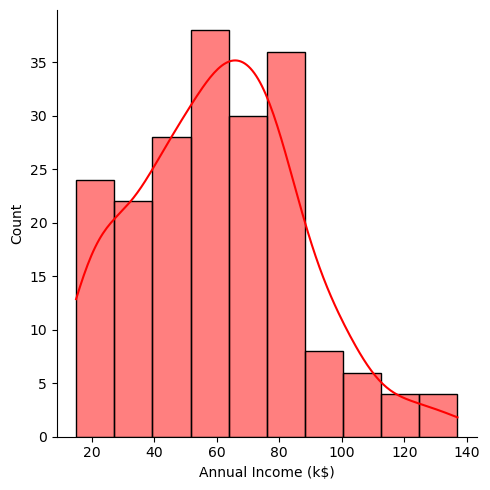

In [6]:
sns.displot(df["Annual Income (k$)"], kde=True, label="Annual Income (k$)", color="r")


plt.show()

# sns.histplot(df["Annual Income (k$)"], kde=True, label="Annual Income (k$)")
# plt.show()

 ✅ The "Annual Income (k$)" variable demonstrates a nearly normal distribution.
 
 ____

In [7]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [8]:
Columns=list(df.columns)

# removing ID and gender columns

Columns.remove('CustomerID') # irrelevant 

Columns.remove('Gender') # not convenient 

Columns 

['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

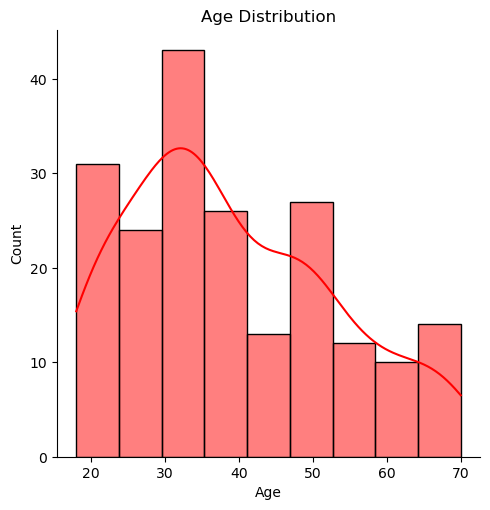

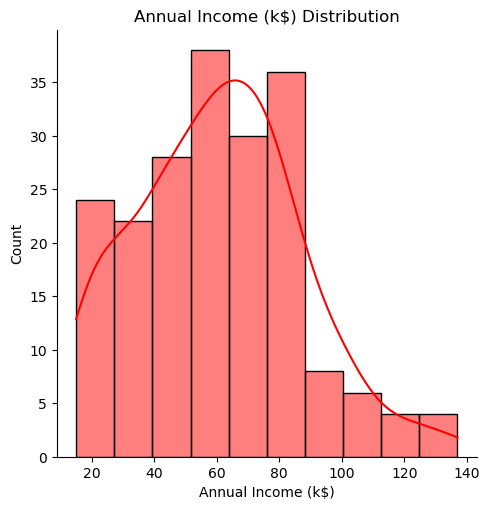

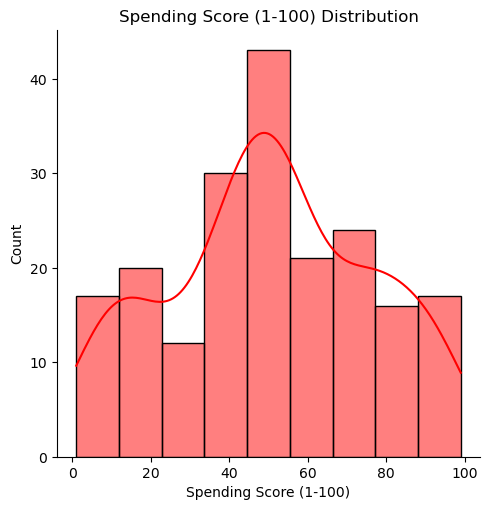

In [9]:
for i in Columns:
    print("\n")
    
    
    # Create a displot for each column
    
    sns.displot(df[i], kde=True, label=i, color="r")
    
    
    # Set the title for the current plot
    
    plt.title(f"{i} Distribution")
    
    
    # Display the plot
    
    plt.show()
    
    print("\n")

In [10]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [11]:
df['Gender'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

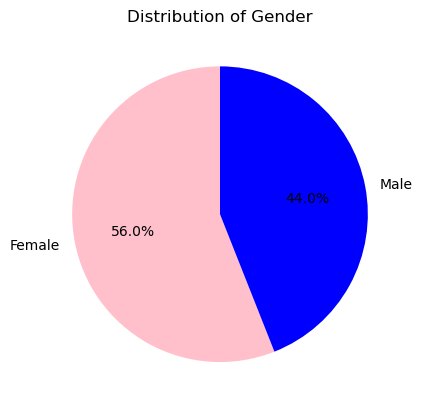

In [12]:
gender_counts = df['Gender'].value_counts()


# Create a pie chart with percentage labels
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['pink', 'blue'])


# Set the title for the pie chart
plt.title('Distribution of Gender')


# Display the plot
plt.show()

_____

**KDE :**

Kernel Density Estimation (KDE) is a non-parametric way to estimate the probability density function of a random variable

____

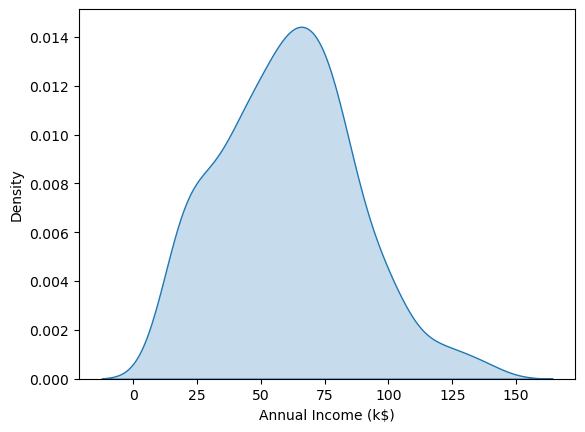

In [13]:
sns.kdeplot(df['Annual Income (k$)'], shade=True, label='Annual Income (k$)')
plt.show()

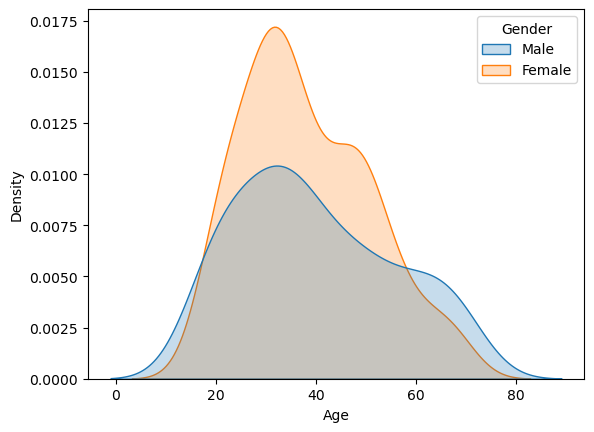

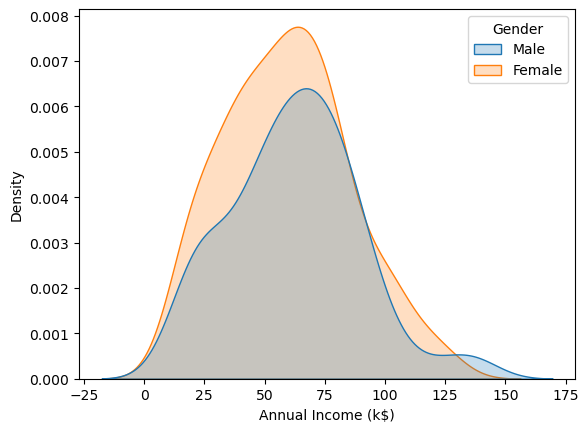

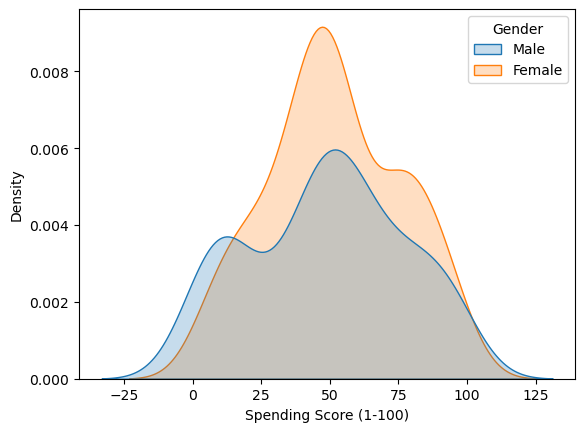

In [14]:
for i in Columns:
    sns.kdeplot(df[i], shade=True,hue=df['Gender'] , label=i)
    plt.show()

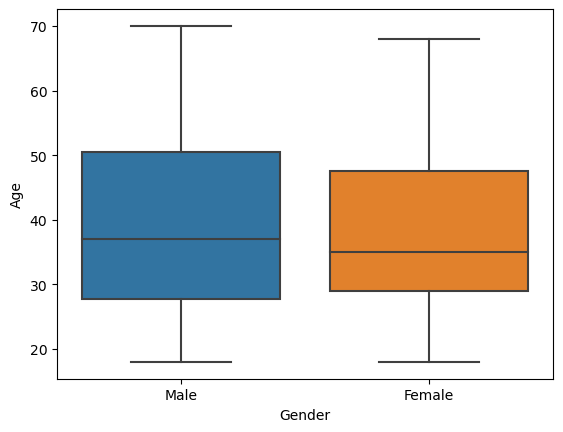

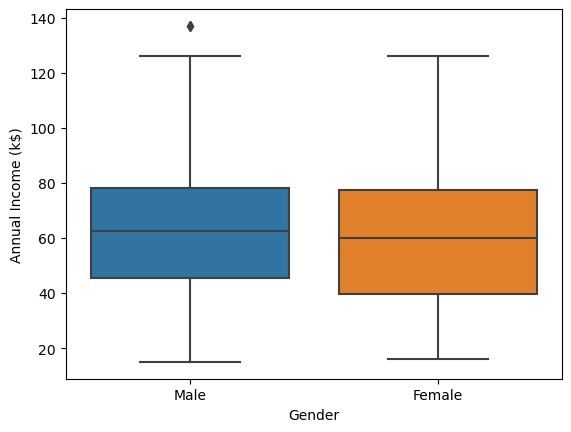

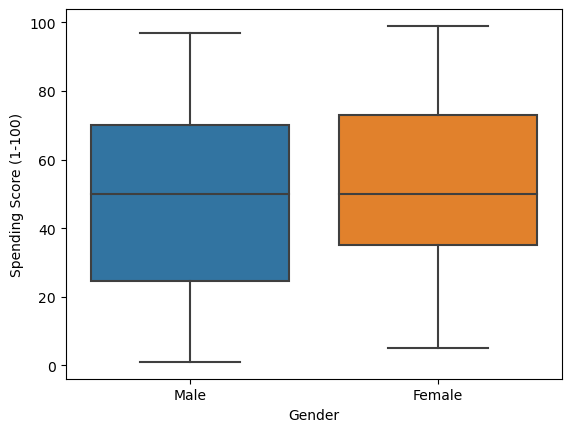

In [15]:
for i in Columns:
    sns.boxplot(data=df,x="Gender",y=i)
    plt.show()

## Bivariate Analysis 

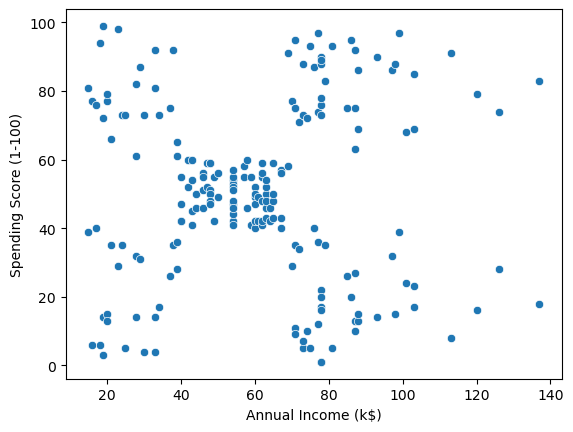

In [16]:
# scatter plot of "spending score" and "annual income"

sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", data=df)
plt.show()


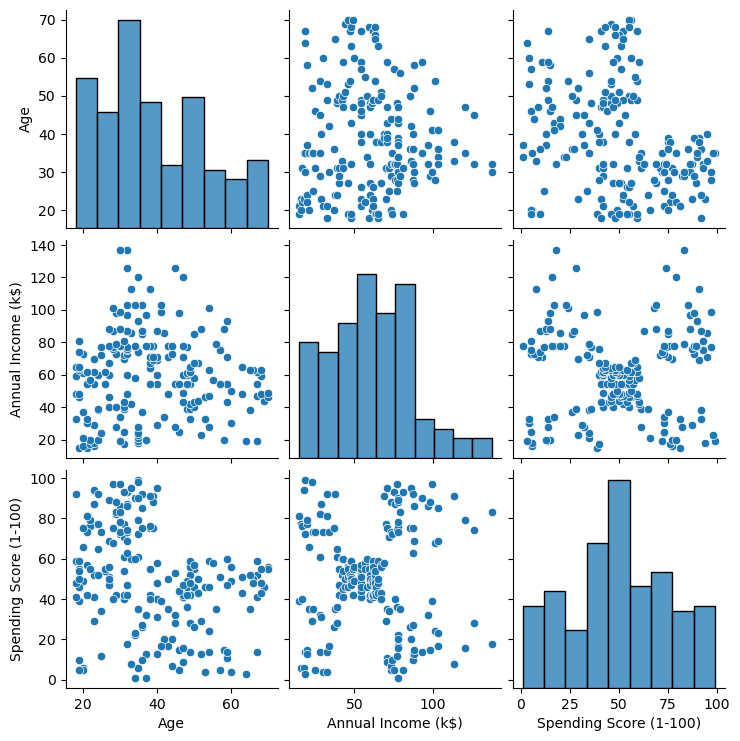

In [17]:
# overview , identify the number of clusters

sns.pairplot(df.iloc[:, 1:])
plt.show()

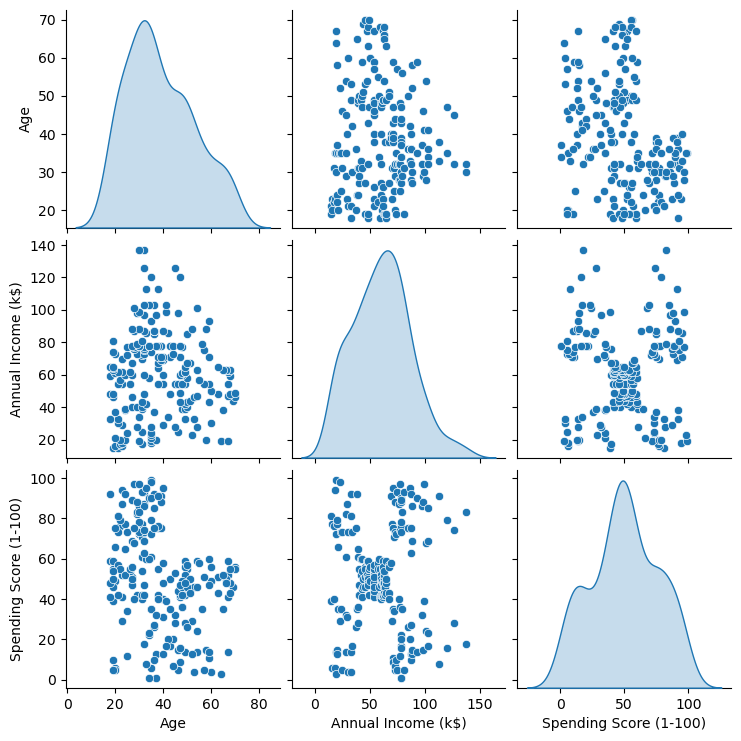

In [18]:
# same thing as above but with a grid

sns.pairplot(df.iloc[:, 1:], diag_kind="kde")
plt.show()

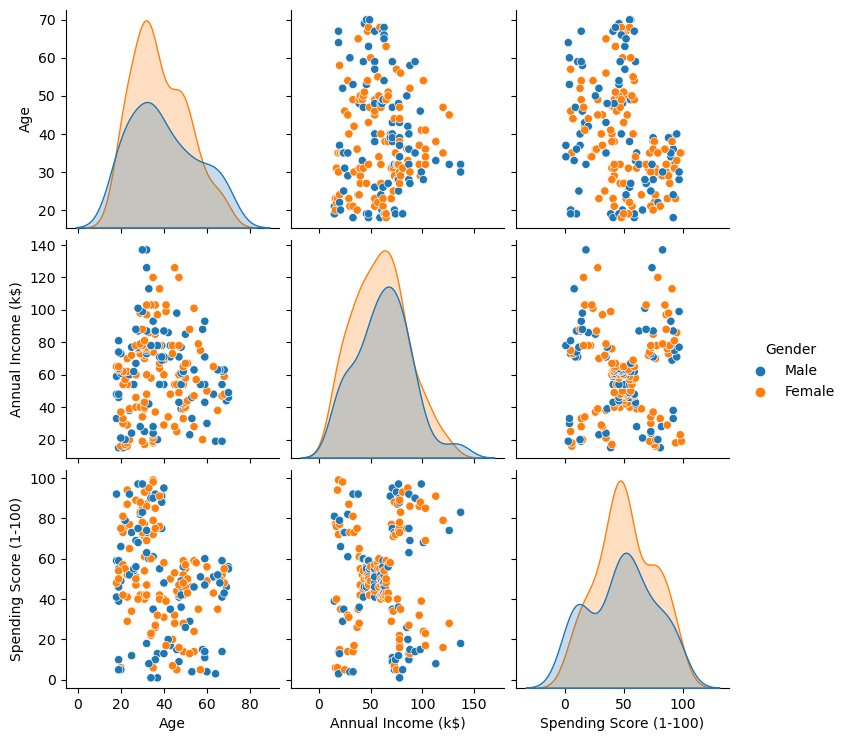

In [19]:
# with a focus on the difference between male and female

sns.pairplot(df.iloc[:, 1:], hue="Gender")
plt.show()

In [20]:
# mean values based en Gender 


df.groupby(["Gender"])[Columns].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [75]:
# correlation exluding "customer id"
df.iloc[:, 1:].corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


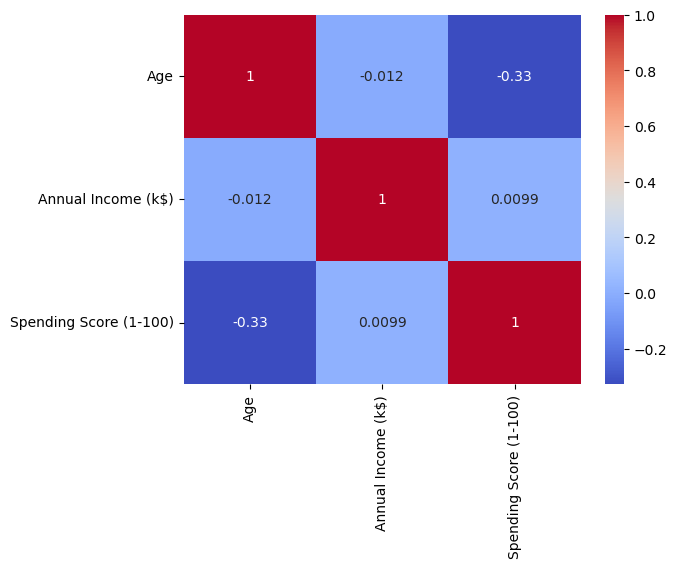

In [21]:
sns.heatmap(df.iloc[:, 1:].corr(), annot=True, cmap="coolwarm")

plt.show()


## Clustering : Univariate - Bivariate  

### Univariate Clustering 

![Alt text](images/5.PNG)

**NB:**

* n_init controls the number of times the algorithm is run with different initializations, and the best result (lowest within-cluster variance) is selected.


* max_iter limits the number of iterations the algorithm performs in a single run.

In [34]:
# 8 clusters by default (n_clusters=8)

clustering1=KMeans( n_clusters=6,n_init=10)

In [35]:
clustering1

KMeans(n_clusters=6, n_init=10)

In [36]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=6, n_init=10)

In [39]:
# labels
clustering1.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4,
       4, 4])

In [59]:
# adding "clustering1.labels_" to the initial dataframe

df['IncomeCluster']=clustering1.labels_

df.sample(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),IncomeCluster
17,18,Male,20,21,66,2
109,110,Male,66,63,48,0
14,15,Male,37,20,13,2
189,190,Female,36,103,85,1
118,119,Female,51,67,43,0
74,75,Male,59,54,47,0
90,91,Female,68,59,55,0
89,90,Female,50,58,46,0
21,22,Male,25,24,73,2
36,37,Female,42,34,17,5


In [60]:
df['IncomeCluster'].value_counts()

0    48
5    42
3    42
2    32
1    28
4     8
Name: IncomeCluster, dtype: int64

### inertia : 

![Alt text](images/6.PNG)

In [46]:
clustering1.inertia_

5050.9047619047615

In [51]:
inertia_scores = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,n_init=10)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)

In [52]:
inertia_scores

[137277.28000000006,
 48660.888888888876,
 23517.33093093093,
 13278.112713472483,
 8481.49619047619,
 5050.9047619047615,
 3941.4163614163635,
 2822.4996947496966,
 2248.1293226381467,
 1745.8751748251761]

### elbow method : Problem d'optimisation !!!

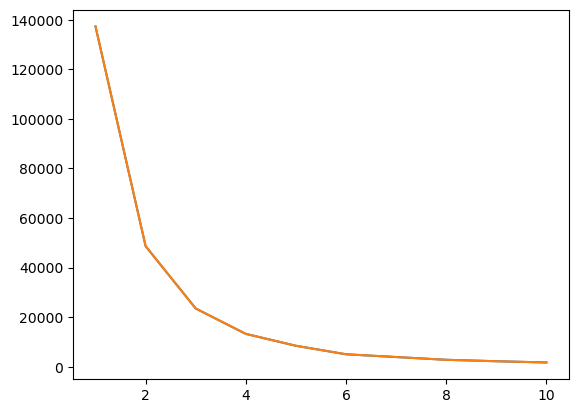

In [55]:
plt.plot(range(1,11),inertia_scores)

plt.show()

In [64]:
df.groupby(['IncomeCluster'])[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().T

IncomeCluster,0,1,2,3,4,5
Age,41.604167,38.214286,34.90625,35.428571,36.500,43.000000
Annual Income (k$),60.083333,93.000000,22.00000,75.095238,124.000,42.238095
Spending Score (1-100),49.041667,50.928571,49.65625,51.095238,49.625,50.666667


### Bivariate Clustering 

In [74]:
clustering2 = KMeans(n_init=10,n_clusters=5)
clustering2

KMeans(n_clusters=5, n_init=10)

In [75]:
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])

KMeans(n_clusters=5, n_init=10)

In [76]:
clustering2.labels_

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 4,
       0, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 2, 1, 4, 1, 2, 1, 2, 1,
       4, 1, 2, 1, 2, 1, 2, 1, 2, 1, 4, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [77]:
df['Spending and Income Cluster'] = clustering2.labels_

df.sample(15)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),IncomeCluster,Spending and Income Cluster
130,131,Male,47,71,9,3,2
74,75,Male,59,54,47,0,4
42,43,Male,48,39,36,5,0
141,142,Male,32,75,93,3,1
87,88,Female,22,57,55,0,4
33,34,Male,18,33,92,5,3
35,36,Female,21,33,81,5,3
72,73,Female,60,50,49,5,4
110,111,Male,65,63,52,0,4
157,158,Female,30,78,78,3,1


In [78]:
intertia_scores2=[]

for i in range(1,11):
    kmeans2=KMeans(n_clusters=i,n_init=10)
    kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    intertia_scores2.append(kmeans2.inertia_)


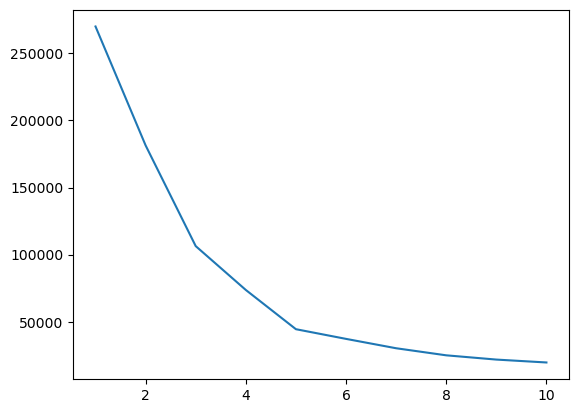

In [79]:
plt.plot(range(1,11),intertia_scores2)

plt.show()

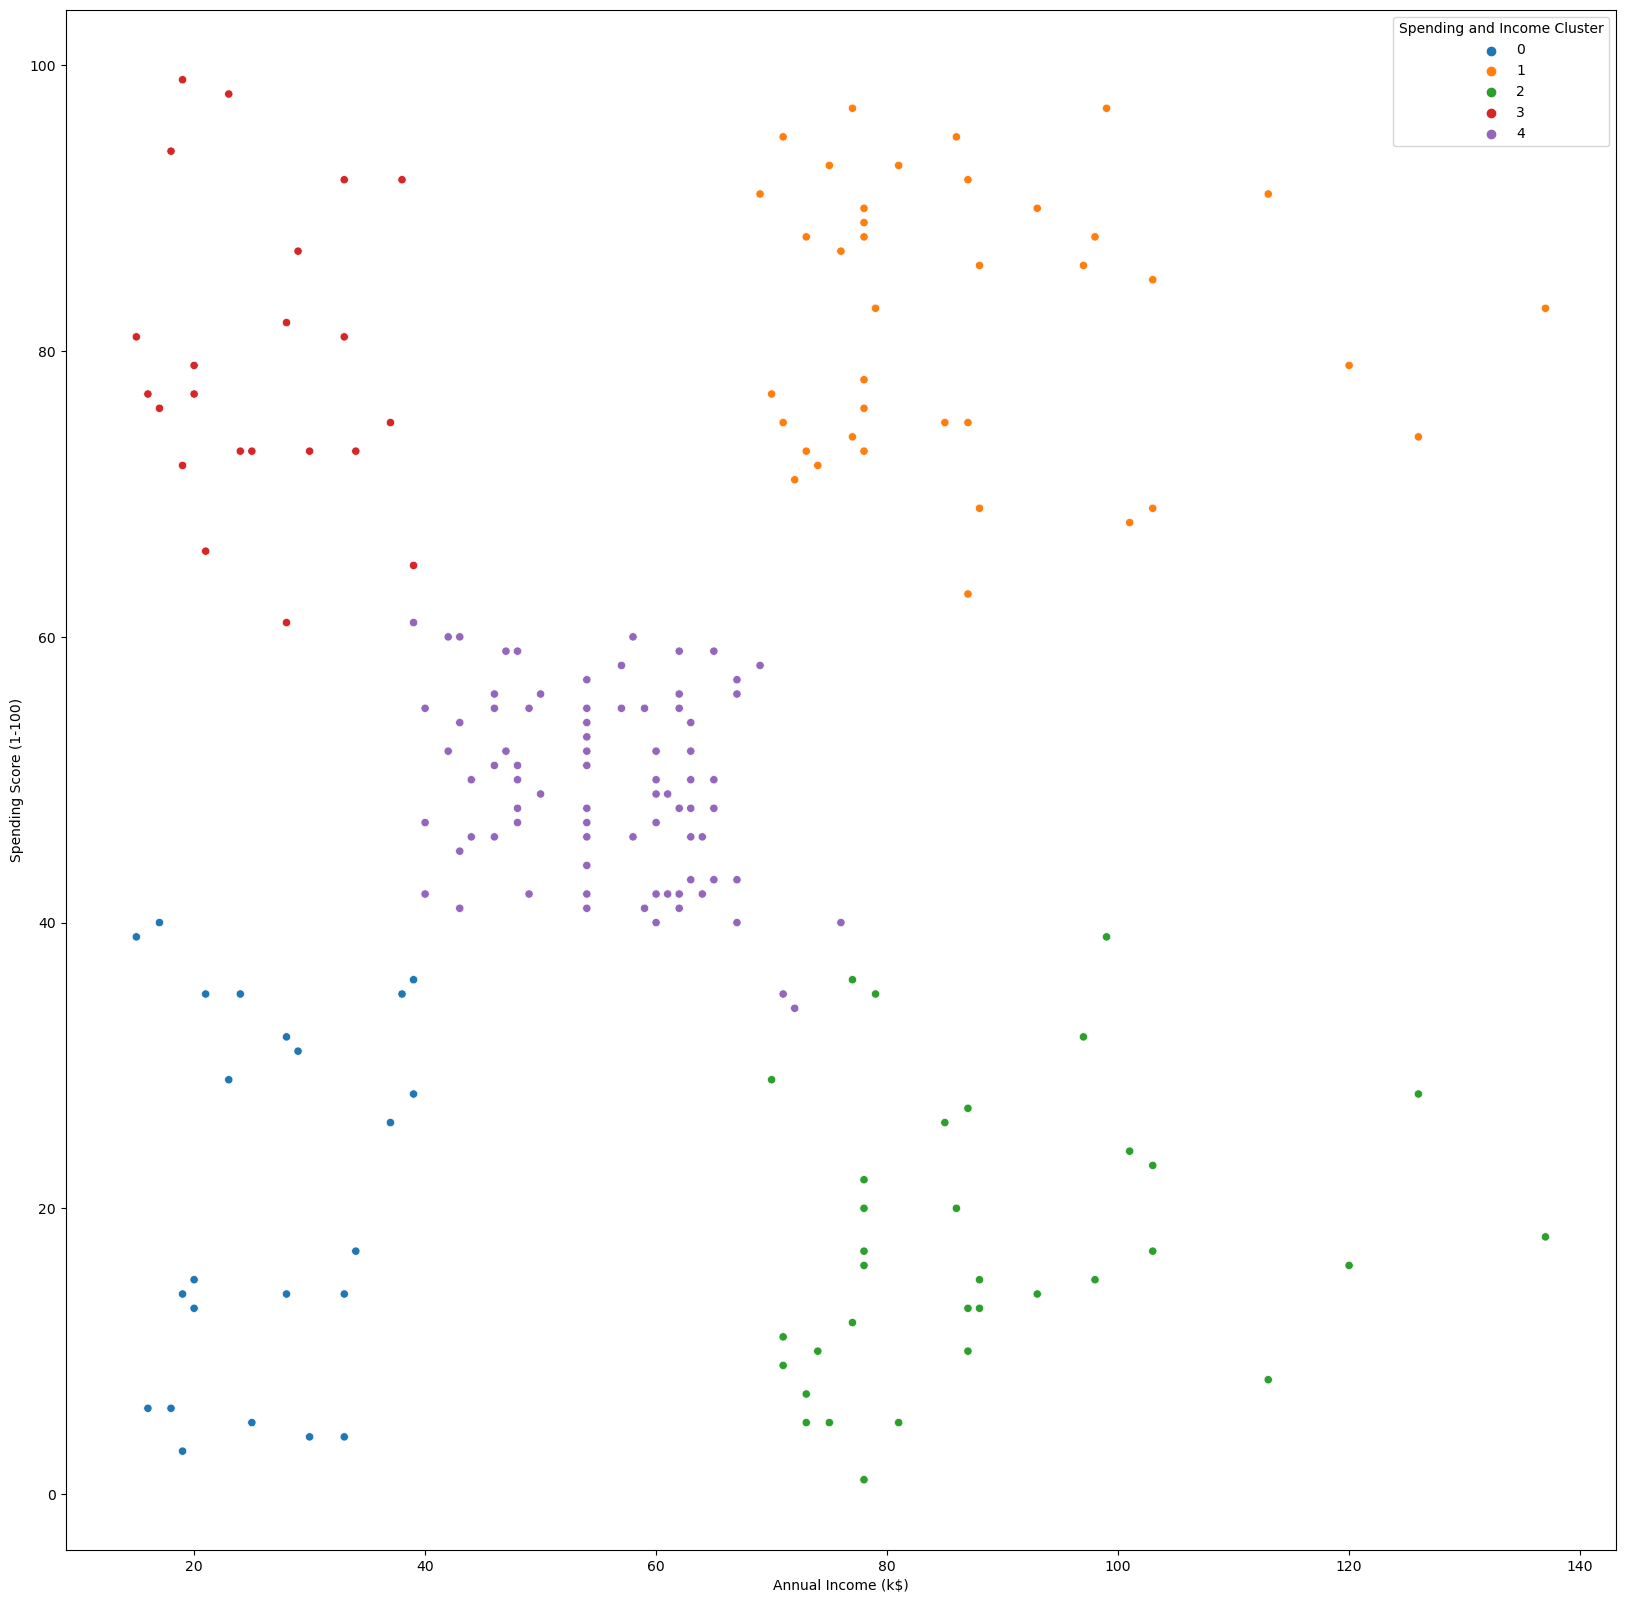

In [92]:
plt.figure(figsize=(20,20))
sns.scatterplot(data=df, x ='Annual Income (k$)',y='Spending Score (1-100)',hue='Spending and Income Cluster',palette='tab10')

plt.show()

In [93]:
Centers = clustering2.cluster_centers_

In [102]:
Centers

5

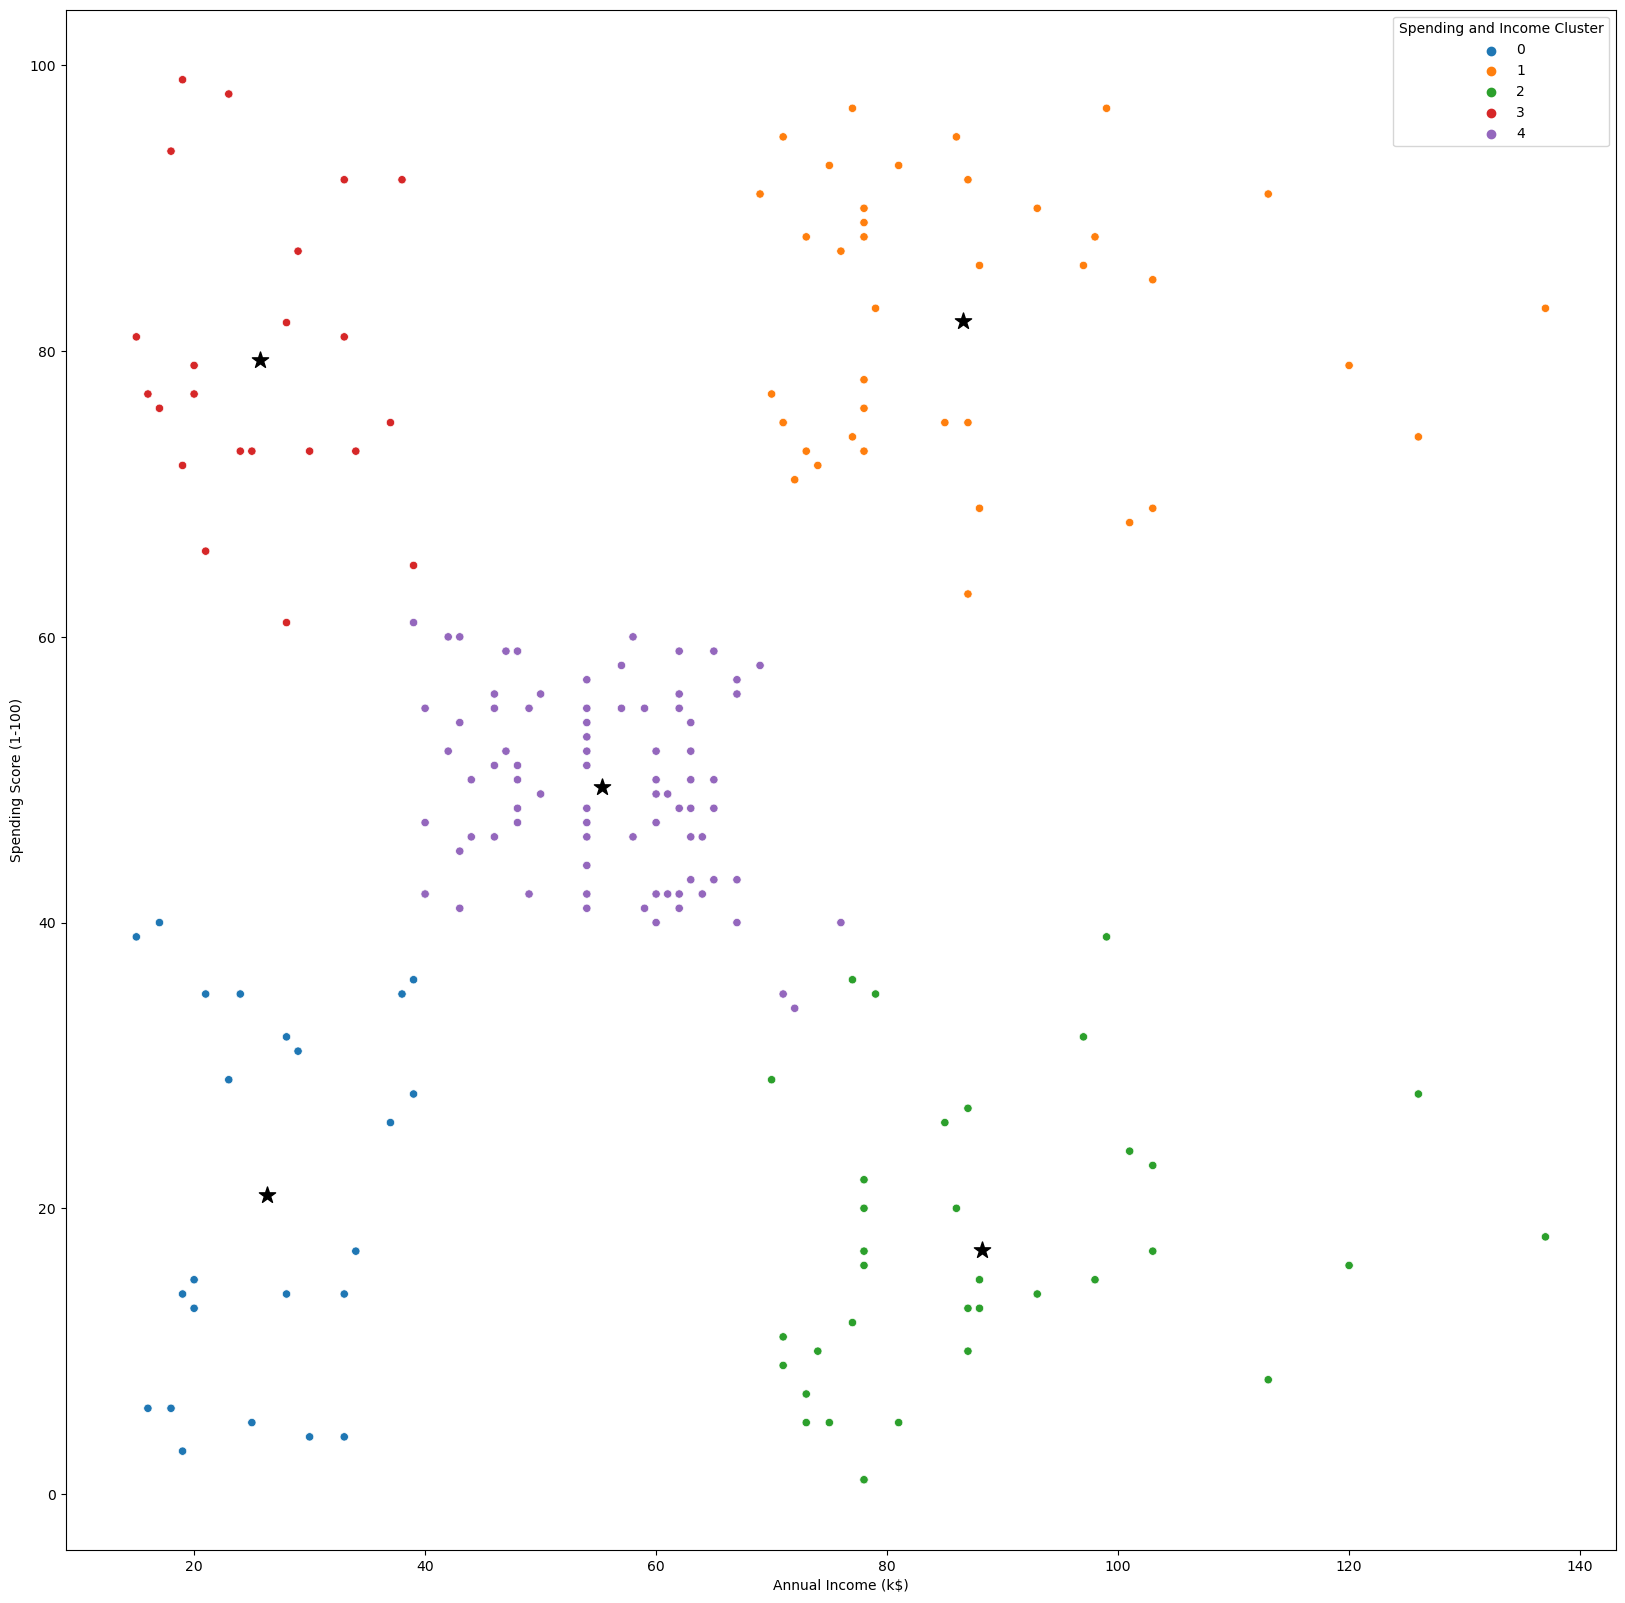

In [104]:
plt.figure(figsize=(20,20))

for i in range(5):
    plt.scatter(x=Centers[i][0],y=Centers[i][1],s=150,c='black',marker='*')

sns.scatterplot(data=df, x ='Annual Income (k$)',y='Spending Score (1-100)',hue='Spending and Income Cluster',palette='tab10')

plt.show()

In [109]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize="index").T

Spending and Income Cluster,0,1,2,3,4
Gender,,,,,
Female,0.608696,0.538462,0.457143,0.590909,0.592593
Male,0.391304,0.461538,0.542857,0.409091,0.407407


In [110]:
df.groupby(['Spending and Income Cluster'])[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().T

Spending and Income Cluster,0,1,2,3,4
Age,45.217391,32.692308,41.114286,25.272727,42.716049
Annual Income (k$),26.304348,86.538462,88.200000,25.727273,55.296296
Spending Score (1-100),20.913043,82.128205,17.114286,79.363636,49.518519


![Alt text](images/7.PNG)

# The fourth cluster 